In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['00 train test valid Code For Exergy.ipynb', '00 train test valid Code For HHV.ipynb', '00 train test valid Code For PCC.ipynb', '00 train test valid Code For Power1.ipynb', '00 train test valid First 8 Algorithm hydrogen.ipynb', '00 train test valid hydrogen2.ipynb', '00 train test valid Power 2 MLP-XGB.ipynb', 'DATAA.csv', 'DATAB.csv']


In [2]:
data = pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data= data.sample(n=10000000, replace=True,random_state=40)
data.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
6171974,45.8500,6.13000,0.35000,0.00000,44.8000,2.87,405,500,460,875,800,2240,694,1400,124.767908,638.055874,461.699778,3025.87689,380.602181,8599.60152
2914311,48.7872,8.13120,1.35520,0.00000,38.5264,3.20,300,800,370,824,1050,3150,502,800,173.307919,228.222438,396.479651,4255.13937,438.625698,9515.01968
12007589,53.9460,6.53575,1.34737,0.10055,36.2604,1.81,370,780,400,800,820,1720,310,1300,77.040764,711.492689,415.779966,2323.44118,396.144528,8606.03929
8183224,43.7100,5.85000,0.01000,0.00000,45.1600,5.27,370,730,450,900,980,2600,566,800,129.368686,403.130903,375.824684,3512.17853,472.659452,7872.52800
9229618,53.9109,6.10698,0.36038,0.00000,37.1217,2.50,440,900,430,850,1200,3300,374,800,164.437667,279.833278,415.624148,4457.76506,499.622822,8598.03007


In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  10000000
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.073168e+01,6.357040e+00,6.837616e-01,3.139844e-01,3.621769e+01,5.390376e+00,3.768848e+02,7.641249e+02,4.935438e+02,8.394105e+02,8.845448e+02,1.940682e+03,5.011714e+02,1.059974e+03,1.304830e+02,5.316501e+02,3.757231e+02,2.617924e+03,4.513449e+02,8.834700e+03
std,1.246254e+01,1.101911e+00,6.700549e-01,5.978635e-01,1.379962e+01,6.535751e+00,5.882684e+01,2.052238e+02,8.871435e+01,6.999197e+01,1.485946e+02,7.346835e+02,1.266869e+02,2.257037e+02,4.134744e+01,1.636169e+02,7.078670e+01,9.910355e+02,8.661791e+01,2.037660e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055963e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854698e+02,7.579587e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259432e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.349717e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466223e+02,6.566271e+02,4.285816e+02,3.377095e+03,5.089997e+02,9.239615e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.663591e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,5.073584e+01,6.357034e+00,6.834875e-01,3.140104e-01,3.621701e+01,5.385046e+00,3.768754e+02,7.639447e+02,4.935924e+02,8.394194e+02,8.845710e+02,1.940132e+03,5.010036e+02,1.060168e+03,1.304577e+02,5.316758e+02,3.757080e+02,2.617165e+03,4.512981e+02,8.835464e+03
std,1.246675e+01,1.101456e+00,6.688695e-01,5.977080e-01,1.380194e+01,6.518086e+00,5.883276e+01,2.050727e+02,8.866418e+01,6.997055e+01,1.485841e+02,7.350102e+02,1.266221e+02,2.257739e+02,4.134022e+01,1.636988e+02,7.084887e+01,9.914798e+02,8.652773e+01,2.039172e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.462862e+01,0.000000e+00,1.709056e+02,3.717407e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.055556e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.855080e+02,7.579073e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259116e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421904e+02,8.350394e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.465692e+02,6.566271e+02,4.287011e+02,3.377095e+03,5.089259e+02,9.240019e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.061818e+02,7.665257e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:


col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T","LNG_MF"]
col_target = ["CO2_P"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(7000000, 1)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.073168e+01,6.357040e+00,6.837616e-01,3.139844e-01,3.621769e+01,5.390376e+00,3.768848e+02,7.641249e+02,4.935438e+02,8.394105e+02,8.845448e+02,1.940682e+03,5.011714e+02,1.059974e+03
std,1.246254e+01,1.101911e+00,6.700549e-01,5.978635e-01,1.379962e+01,6.535751e+00,5.882684e+01,2.052238e+02,8.871435e+01,6.999197e+01,1.485946e+02,7.346835e+02,1.266869e+02,2.257037e+02
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03


In [13]:
target_vars.describe()

,CO2_P
count,7.000000e+06
mean,5.316501e+02
std,1.636169e+02
min,0.000000e+00
25%,4.371646e+02
50%,5.468958e+02
75%,6.566271e+02
max,7.663591e+02


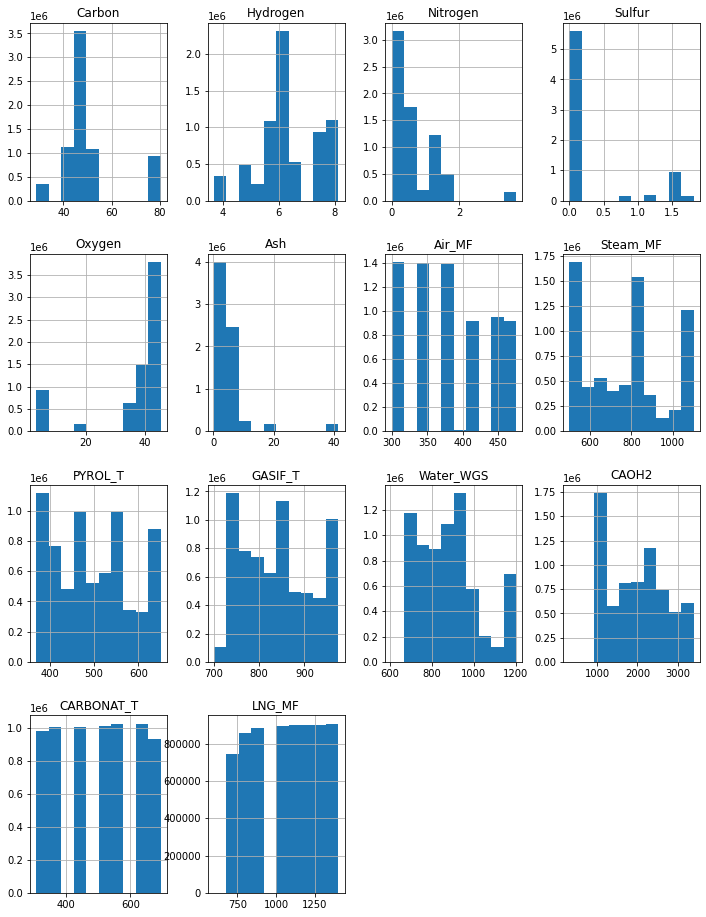

In [14]:
feature_vars.hist(bins = 10 , figsize= (12,16)) ;
plt.savefig("out.png")

<AxesSubplot:>

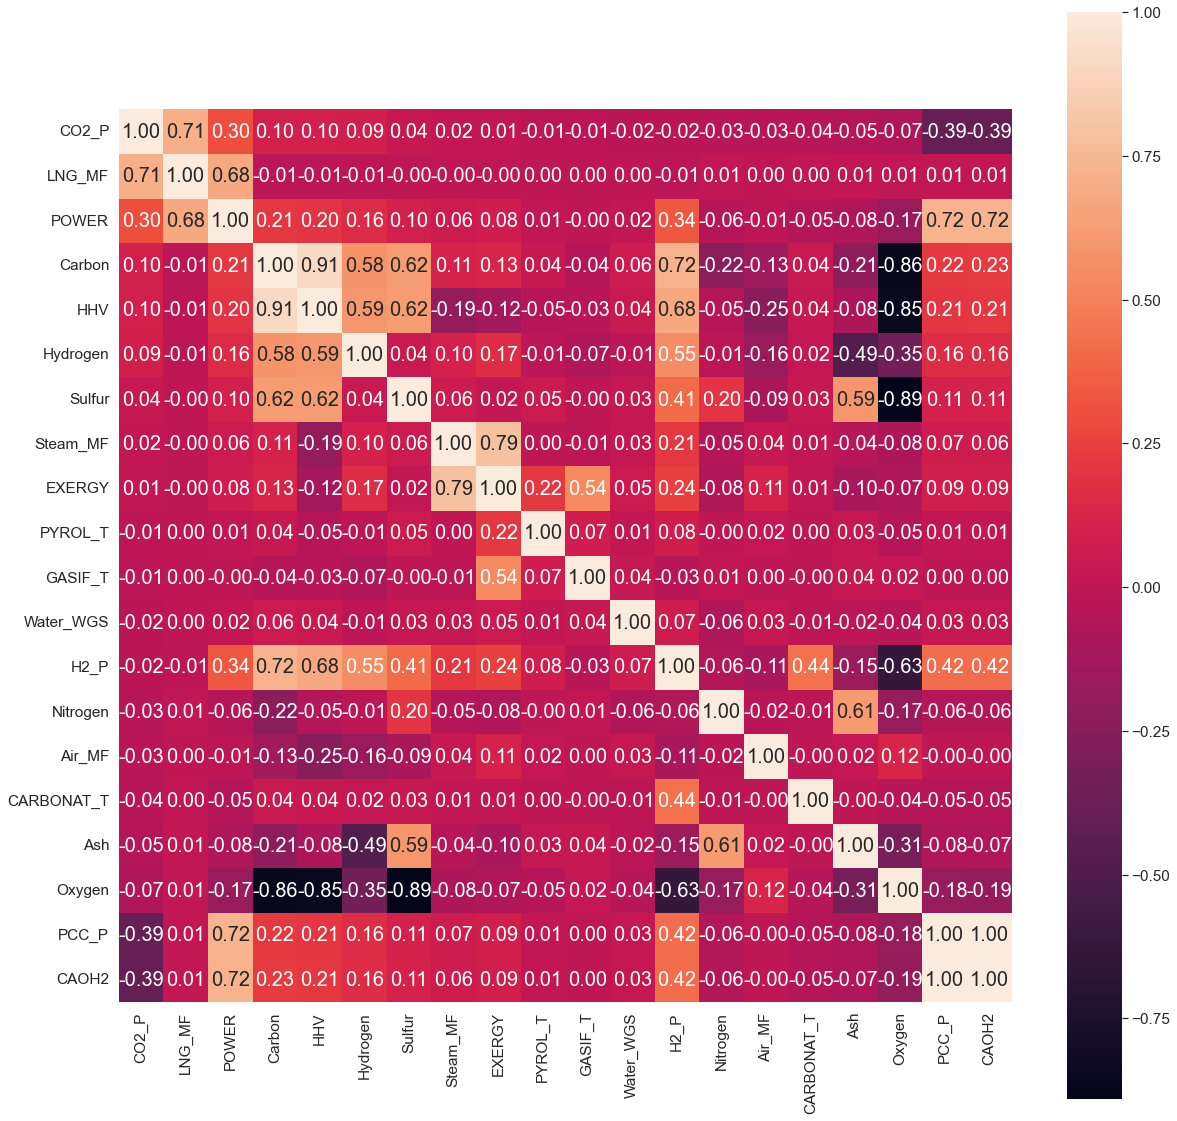

In [15]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'CO2_P')['CO2_P'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [16]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
train_X.shape

(7000000, 14)

In [17]:
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]
test_X.shape

(2000000, 14)

In [18]:
valid_X = valid[feature_vars.columns]
valid_y = valid[target_vars.columns]
valid_X.shape

(1000000, 14)

In [19]:
test_X.columns

Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T', 'Water_WGS', 'CAOH2', 'CARBONAT_T',
       'LNG_MF'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]
##
valid=valid[list(valid_X.columns.values)+ col_target]
##
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

sc_valid=pd.DataFrame(columns=valid.columns, index=valid.index)
sc_valid[sc_valid.columns]=sc.fit_transform(valid)

In [21]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,CO2_P
12449525,2.370169,0.973727,-0.333945,2.117566,-2.395551,0.261580,0.477932,0.662082,0.636382,-1.277439,1.113467,1.986322,-0.498642,0.620399,0.763839
11042590,-1.755797,-2.175347,-0.005614,1.431791,0.667577,2.221570,1.072898,-0.653554,1.335255,1.222848,-0.165179,-1.076221,-1.509007,-1.151836,-0.577480
3753946,-0.391708,-0.206042,-0.498111,-0.525177,0.621924,-0.385629,-0.712001,-1.287009,-1.392602,-1.277439,-0.232477,-1.280391,-0.498642,-0.708777,-0.242150
13389865,2.370169,0.973727,-0.333945,2.117566,-2.395551,0.261580,-0.117035,1.636628,-0.378110,-0.205888,1.113467,1.169644,-0.498642,1.506516,1.434499
2810973,-0.156026,1.610076,1.002065,-0.525177,0.167302,-0.335138,-0.117035,-1.287009,-1.392602,0.508480,-1.241935,1.237701,0.511723,1.506516,1.178330


In [22]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,CO2_P
11727996,-1.620218,-2.425458,4.488190,2.508733,-1.263483,5.540731,0.478043,0.127054,-0.040517,-0.920665,-0.266320,-1.088601,0.007869,-1.595259,-0.912510
2854845,-0.156307,1.610747,1.004251,-0.525358,0.167323,-0.335228,-0.116864,0.175817,0.636194,1.580388,0.776860,1.564424,1.018752,1.505188,-0.037126
3783073,-0.391910,-0.206122,-0.498584,-0.525358,0.621868,-0.385857,-1.306678,0.175817,-0.773620,-1.277958,0.440350,-1.279074,1.524193,-0.709417,-0.242186
13554230,2.369035,0.974135,-0.334127,2.118074,-2.395100,0.263107,-0.116864,1.638714,-0.378872,0.508508,-0.905689,1.836530,1.524193,-0.709417,-0.242186
3545387,-0.156307,1.610747,1.004251,-0.525358,0.167323,-0.335228,1.072949,-1.287079,-0.378872,0.151215,-1.242199,1.169872,-1.003013,-0.266496,-0.088435


In [23]:
sc_valid.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,CO2_P
10100929,-0.556151,-1.305152,1.249909,-0.241004,-0.153465,0.323475,-0.117485,-0.896477,-1.109704,-0.562747,0.038026,-1.078032,0.512815,1.507956,1.436011
9490840,0.254939,-0.228586,-0.482715,-0.525372,0.065488,-0.442743,1.666984,-1.286144,1.650246,1.578694,0.442324,-1.282352,-1.003325,1.507956,1.436011
8696741,-0.109329,1.343227,0.891318,-0.341369,-0.082454,0.020053,-1.307130,-0.945186,0.974340,0.507973,-0.029357,-0.492316,1.523575,0.621568,0.764842
567736,-0.227252,-0.053521,-0.543048,-0.508644,0.583455,-0.641960,1.072161,-1.286144,0.636387,-1.276561,-0.905334,0.352205,1.523575,-0.708014,-0.391261
5063533,-0.391702,-0.207707,-0.498224,-0.525372,0.621859,-0.386043,1.666984,0.175104,-0.377472,-1.276561,0.442324,-0.601287,-0.497945,1.507956,1.436011


In [24]:
train_X =  sc_train.drop(['CO2_P'] , axis=1)
test_X =  sc_test.drop(['CO2_P'] , axis=1)
valid_X=sc_valid.drop(['CO2_P'] , axis=1)

In [25]:
test_X.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
11727996,-1.620218,-2.425458,4.488190,2.508733,-1.263483,5.540731,0.478043,0.127054,-0.040517,-0.920665,-0.266320,-1.088601,0.007869,-1.595259
2854845,-0.156307,1.610747,1.004251,-0.525358,0.167323,-0.335228,-0.116864,0.175817,0.636194,1.580388,0.776860,1.564424,1.018752,1.505188
3783073,-0.391910,-0.206122,-0.498584,-0.525358,0.621868,-0.385857,-1.306678,0.175817,-0.773620,-1.277958,0.440350,-1.279074,1.524193,-0.709417
13554230,2.369035,0.974135,-0.334127,2.118074,-2.395100,0.263107,-0.116864,1.638714,-0.378872,0.508508,-0.905689,1.836530,1.524193,-0.709417
3545387,-0.156307,1.610747,1.004251,-0.525358,0.167323,-0.335228,1.072949,-1.287079,-0.378872,0.151215,-1.242199,1.169872,-1.003013,-0.266496


In [26]:
test_y.head()

,CO2_P
11727996,382.298959
2854845,525.598265
3783073,492.030203
13554230,492.030208
3545387,517.199064


In [27]:
train_X.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
12449525,2.370169,0.973727,-0.333945,2.117566,-2.395551,0.261580,0.477932,0.662082,0.636382,-1.277439,1.113467,1.986322,-0.498642,0.620399
11042590,-1.755797,-2.175347,-0.005614,1.431791,0.667577,2.221570,1.072898,-0.653554,1.335255,1.222848,-0.165179,-1.076221,-1.509007,-1.151836
3753946,-0.391708,-0.206042,-0.498111,-0.525177,0.621924,-0.385629,-0.712001,-1.287009,-1.392602,-1.277439,-0.232477,-1.280391,-0.498642,-0.708777
13389865,2.370169,0.973727,-0.333945,2.117566,-2.395551,0.261580,-0.117035,1.636628,-0.378110,-0.205888,1.113467,1.169644,-0.498642,1.506516
2810973,-0.156026,1.610076,1.002065,-0.525177,0.167302,-0.335138,-0.117035,-1.287009,-1.392602,0.508480,-1.241935,1.237701,0.511723,1.506516


In [28]:
train_y.head()

,CO2_P
12449525,656.627068
11042590,437.164581
3753946,492.030203
13389865,766.358311
2810973,724.444655


In [29]:
valid_X.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF
10100929,-0.556151,-1.305152,1.249909,-0.241004,-0.153465,0.323475,-0.117485,-0.896477,-1.109704,-0.562747,0.038026,-1.078032,0.512815,1.507956
9490840,0.254939,-0.228586,-0.482715,-0.525372,0.065488,-0.442743,1.666984,-1.286144,1.650246,1.578694,0.442324,-1.282352,-1.003325,1.507956
8696741,-0.109329,1.343227,0.891318,-0.341369,-0.082454,0.020053,-1.307130,-0.945186,0.974340,0.507973,-0.029357,-0.492316,1.523575,0.621568
567736,-0.227252,-0.053521,-0.543048,-0.508644,0.583455,-0.641960,1.072161,-1.286144,0.636387,-1.276561,-0.905334,0.352205,1.523575,-0.708014
5063533,-0.391702,-0.207707,-0.498224,-0.525372,0.621859,-0.386043,1.666984,0.175104,-0.377472,-1.276561,0.442324,-0.601287,-0.497945,1.507956


In [30]:
valid_y.head()

,CO2_P
10100929,766.358311
9490840,766.358311
8696741,656.627068
567736,467.612584
5063533,766.358311


In [31]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, TweedieRegressor, RANSACRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import lightgbm as lgb
lgb.LGBMRegressor()

LGBMRegressor()

In [32]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet()],
           ['BayesianRidge: ', BayesianRidge()],
           ['TweedieRegressor: ', TweedieRegressor()],
           ['RANSACRegressor: ', RANSACRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
            ['LGBMRegressor: ', lgb.LGBMRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [33]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 40
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Valid_R2_Score"]=metrics.r2_score(valid_y, curr_model.predict(valid_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    curr_model_data["Valid_RMSE_Score"] = sqrt(mean_squared_error(valid_y,curr_model.predict(valid_X)))

    model_data.append(curr_model_data)

In [34]:
ypred=curr_model.predict(valid_X)

Text(0, 0.5, 'Predicted')

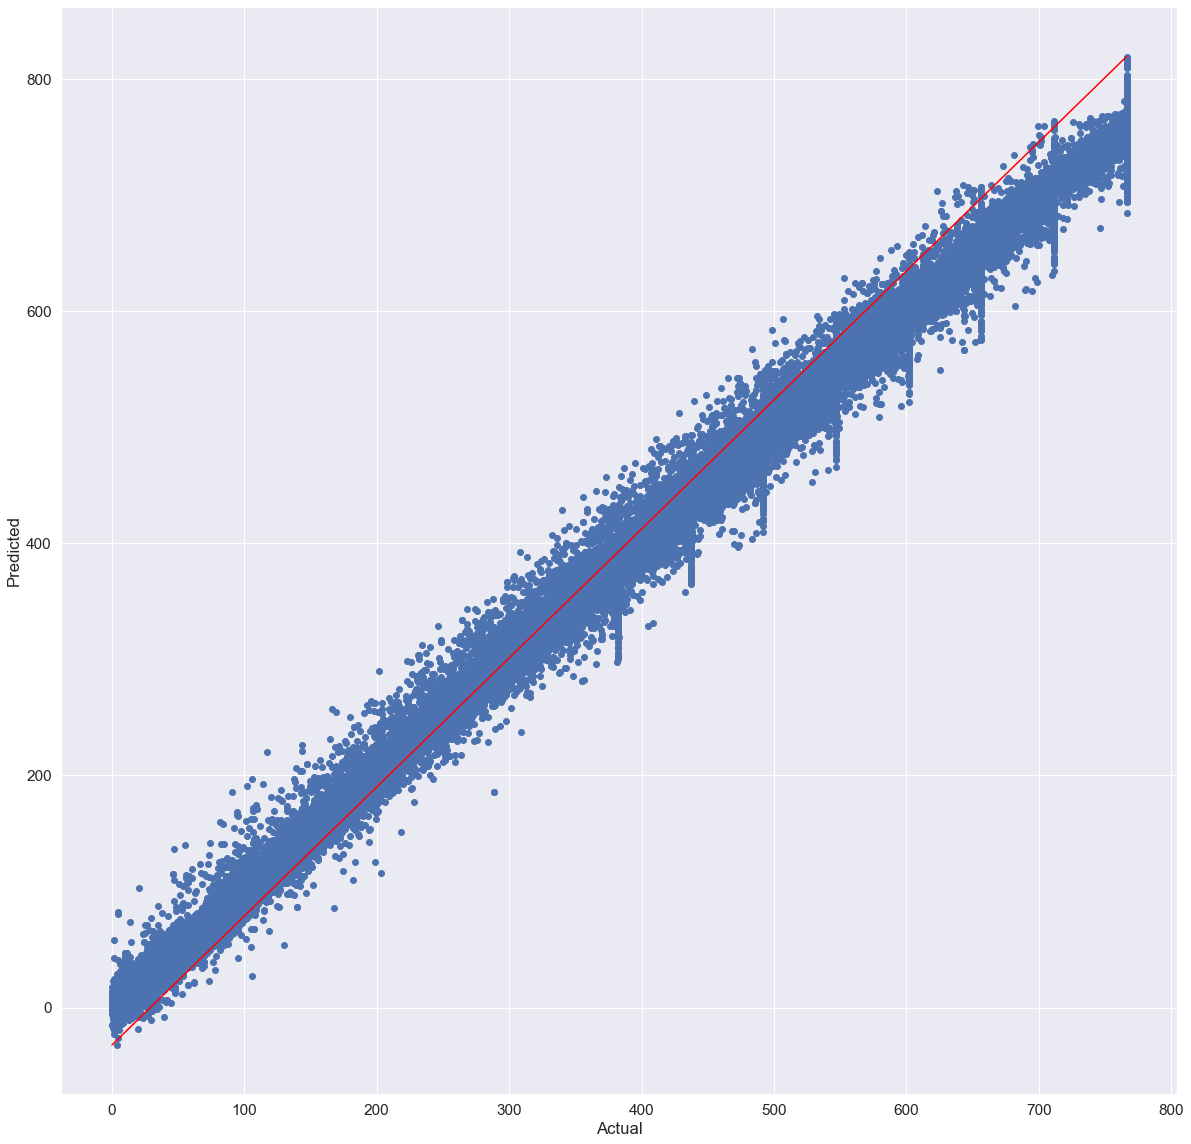

In [35]:
plt.scatter(valid_y,ypred)
plt.plot([valid_y.min(),valid_y.max()],[ypred.min(),ypred.max()], color='red')
#plt.plot(valid_X,valid_y, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [36]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 5.27939772605896,
  'Train_R2_Score': 0.7173062872531591,
  'Test_R2_Score': 0.7166881715647007,
  'Valid_R2_Score': 0.7170918785656153,
  'Test_RMSE_Score': 87.13203319694657,
  'Valid_RMSE_Score': 86.96032878836554},
 {'Name': 'Ridge: ',
  'Train_Time': 1.0182747840881348,
  'Train_R2_Score': 0.7183693912520859,
  'Test_R2_Score': 0.7177671405678114,
  'Valid_R2_Score': 0.7181676083491271,
  'Test_RMSE_Score': 86.96595745582326,
  'Valid_RMSE_Score': 86.79484235888293},
 {'Name': 'ElasticNet: ',
  'Train_Time': 4.373306751251221,
  'Train_R2_Score': 0.6301979123895505,
  'Test_R2_Score': 0.629483538981269,
  'Valid_R2_Score': 0.6300166002462537,
  'Test_RMSE_Score': 99.64356300228758,
  'Valid_RMSE_Score': 99.44651882637876},
 {'Name': 'BayesianRidge: ',
  'Train_Time': 4.635579347610474,
  'Train_R2_Score': 0.718369391244456,
  'Test_R2_Score': 0.7177671404823848,
  'Valid_R2_Score': 0.718167604616109,
  'Test_RMSE_Score': 86.96595746898475,
  'V

In [37]:
df1 = pd.DataFrame(model_data)
df1

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Valid_R2_Score,Test_RMSE_Score,Valid_RMSE_Score
0,Lasso:,5.279398,0.717306,0.716688,0.717092,87.132033,86.960329
1,Ridge:,1.018275,0.718369,0.717767,0.718168,86.965957,86.794842
2,ElasticNet:,4.373307,0.630198,0.629484,0.630017,99.643563,99.446519
3,BayesianRidge:,4.635579,0.718369,0.717767,0.718168,86.965957,86.794843
4,TweedieRegressor:,5.033538,0.529506,0.528864,0.529351,112.361729,112.162295
5,RANSACRegressor:,21.939320,0.485698,0.484527,0.485641,117.529879,117.255047
6,KNeighborsRegressor:,117.687224,0.986578,0.979103,0.979111,23.664201,23.629889
7,LGBMRegressor:,22.482297,0.995225,0.995197,0.995150,11.345471,11.386222
8,ExtraTreeRegressor :,2700.426740,1.000000,0.999941,0.999958,1.255022,1.065534
9,GradientBoostingClassifier:,2907.884931,0.966123,0.965976,0.966122,30.195150,30.092340


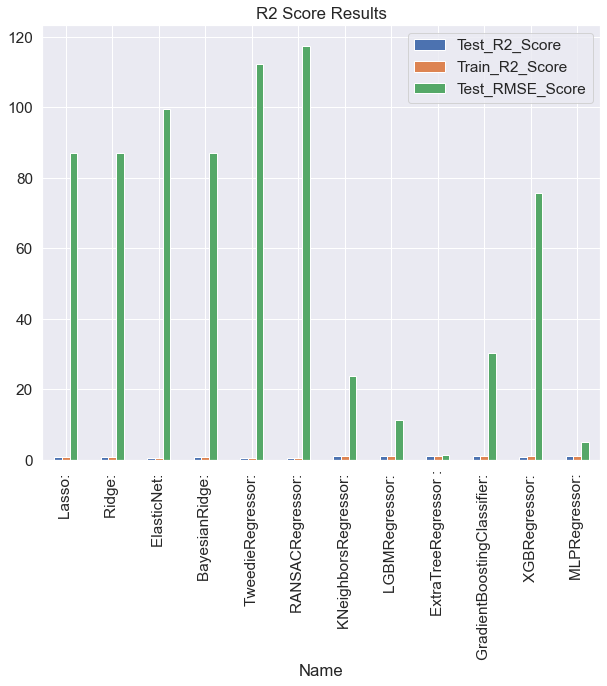

In [38]:
df1.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;